In [86]:
import pandas as pd

df = pd.read_csv("./diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.

In [87]:
missing_values = df.isnull().sum()
missing_values


Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [88]:
from sklearn.preprocessing import MinMaxScaler

df.fillna(df.median(), inplace=True)  # Заполнение отсутствующих значений
scaler = MinMaxScaler()  # Нормализация данных
scaled_features = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
scaled_data = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=['float64', 'int64']).columns)

Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили), постройте 3d-визуализацию признаков.

In [89]:
basic_stats = df.describe()
basic_stats


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


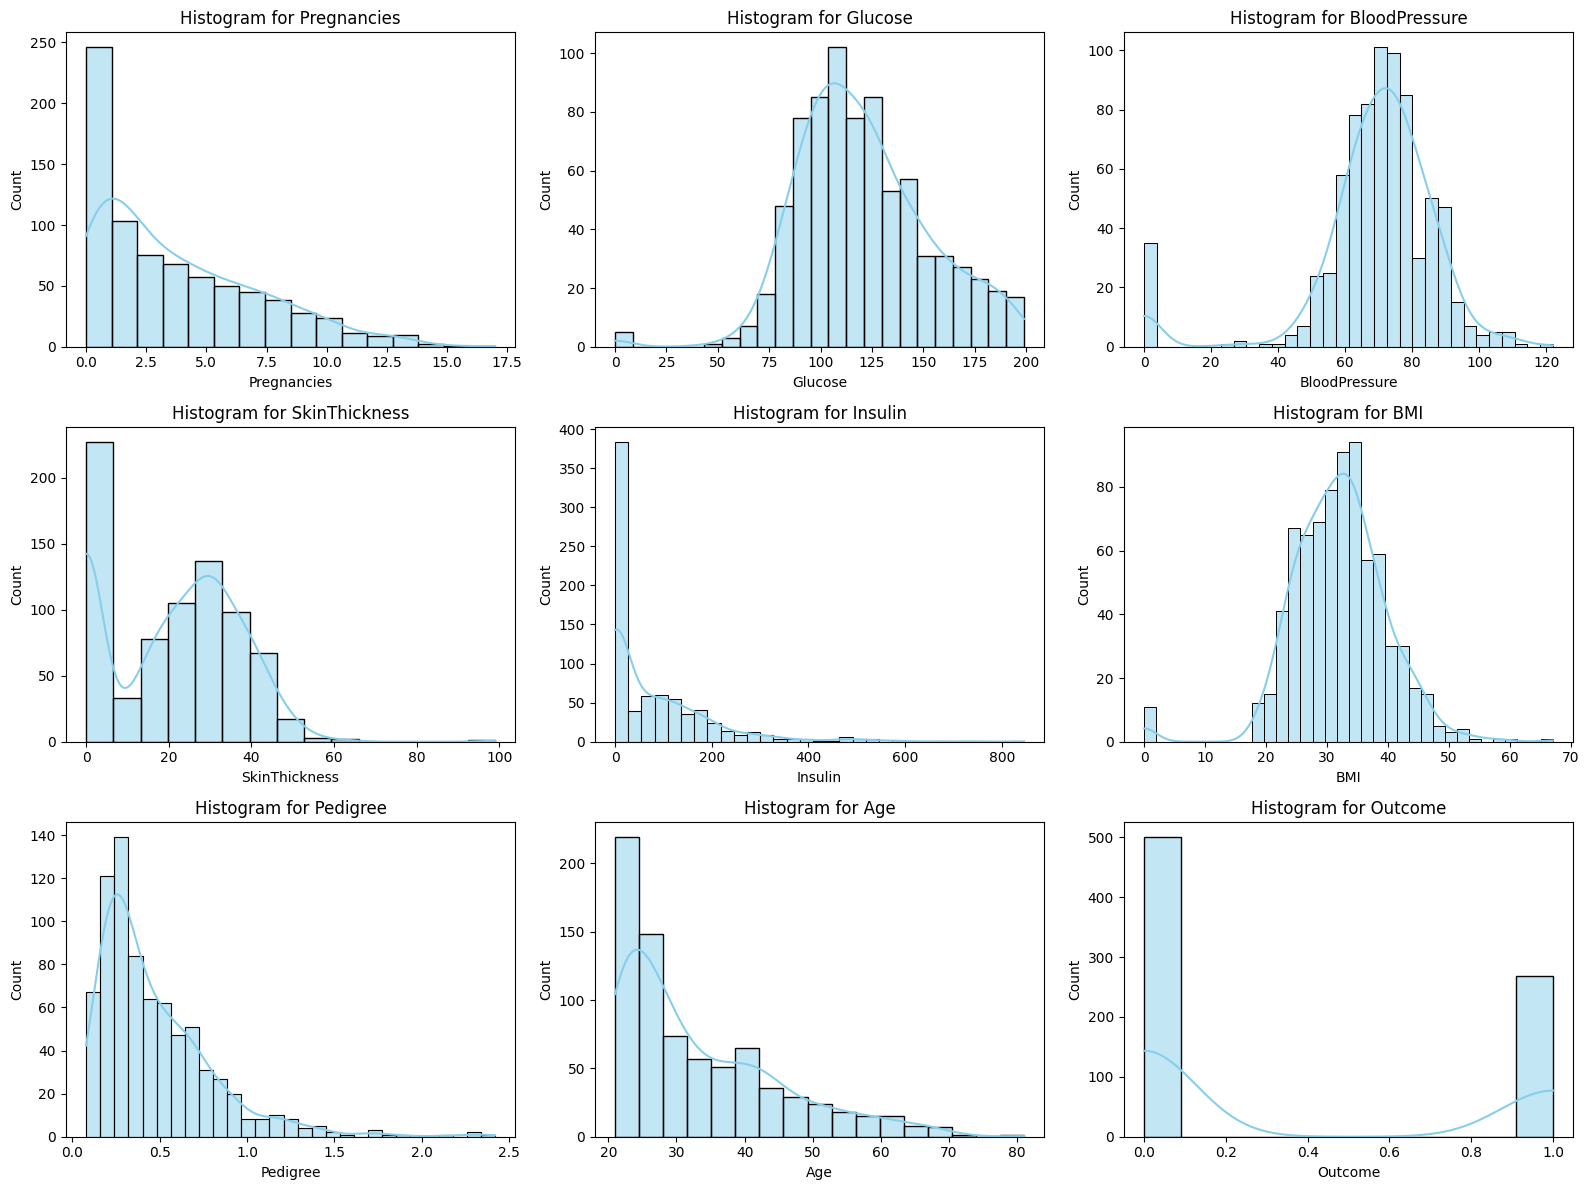

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f"Histogram for {column}")
plt.tight_layout()
plt.show()

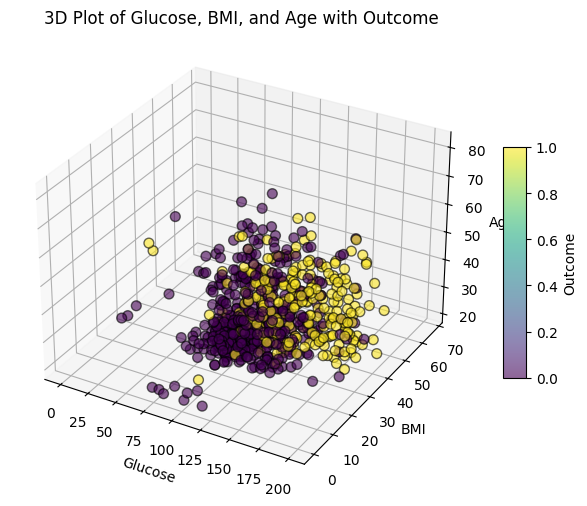

In [91]:
from mpl_toolkits.mplot3d import Axes3D

# Setting up a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Selecting features for 3D plot
x = df['Glucose']
y = df['BMI']
z = df['Age']

# Plotting
scatter = ax.scatter(x, y, z, c=df['Outcome'], cmap='viridis', edgecolor='k', s=50, alpha=0.6)
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

# Adding a color bar to show the relationship to the outcome
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Outcome')

# Show the plot
plt.title('3D Plot of Glucose, BMI, and Age with Outcome')
plt.show()


Реализуйте метод k-ближайших соседей без использования сторонних библиотек, кроме NumPy и Pandas.

In [92]:
import numpy as np

def euclidean_distance(x1, x2):
    """
    Compute the Euclidean distance between two numpy arrays.
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Example usage with the first two rows of the dataset to test the function
distance_example = euclidean_distance(df.iloc[0, :-1], df.iloc[1, :-1])
print(distance_example)

def knn_predict(X_train, y_train, X_test, k=3):
    """
    Predict the class labels for the provided test data based on k-NN algorithm.
    X_train : Training feature set
    y_train : Training labels
    X_test : Test feature set
    k : Number of nearest neighbors to consider
    """
    predictions = []
    
    # Iterate over each test instance
    for test_instance in X_test:
        # Calculate distances from the test instance to all training instances
        distances = np.array([euclidean_distance(test_instance, train_instance) for train_instance in X_train])
        
        # Get the indices of the k smallest distances
        k_indices = np.argsort(distances)[:k]
        
        # Voting mechanism: majority label among the k closest training instances
        k_nearest_labels = y_train[k_indices]
        # Predict the label by majority vote
        most_common = np.bincount(k_nearest_labels).argmax()
        
        predictions.append(most_common)
    
    return predictions


# Example: Predict using the first 5 instances as test set
X_train = df.iloc[:, :-1].values
y_train = df['Outcome'].values
X_test = df.iloc[:5, :-1].values
k_values = [3]

predictions = {k: knn_predict(X_train, y_train, X_test, k) for k in k_values}
predictions



66.90348403483932


{3: [np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1)]}

Постройте две модели k-NN с различными наборами признаков:
  - Модель 1: Признаки случайно отбираются .
  - Модель 2: Фиксированный набор признаков, который выбирается заранее.

In [93]:
import random

random_features = random.sample(list(df.columns[:-1]), 4)
random_features


['Pregnancies', 'Insulin', 'Age', 'SkinThickness']

In [94]:
predefined_features = ['Glucose', 'BMI', 'Age']
predefined_features


['Glucose', 'BMI', 'Age']

In [95]:
from sklearn.model_selection import train_test_split

# Correct slicing for the test set, assuming you are splitting a DataFrame
# Here is an example to ensure correct splitting
X_train_random, X_test_random, y_train, y_test = train_test_split(df[random_features].values, df['Outcome'].values, test_size=0.3, random_state=42)
X_train_predefined, X_test_predefined, y_train, y_test = train_test_split(df[predefined_features].values, df['Outcome'].values, test_size=0.3, random_state=42)


In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_knn_models(X_train, y_train, X_test, y_test, k_values):
    """
    Evaluate k-NN models with different k values and return accuracy and confusion matrices.
    """
    results = {}
    for k in k_values:
        # Predict the outcomes
        y_pred = knn_predict(X_train, y_train, X_test, k)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
     
        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Store results
        results[k] = {
            'Accuracy': accuracy,
            'Confusion Matrix': conf_matrix
        }
    
    return results

Для каждой модели проведите оценку на тестовом наборе данных при разных значениях k. Выберите несколько различных значений k, например, k=3, k=5, k=10, и т. д. Постройте матрицу ошибок.

In [97]:
k_values = [3, 5, 10]

# Evaluate Model 1 (Random Features)
results_random = evaluate_knn_models(X_train_random, y_train, X_test_random, y_test, k_values)

# Evaluate Model 2 (Predefined Features)
results_predefined = evaluate_knn_models(X_train_predefined, y_train, X_test_predefined, y_test, k_values)


In [98]:
def print_results(results, model_name):
    print(f"Results for {model_name}:\n")
    for k, metrics in results.items():
        print(f"k = {k}:")
        print(f"  Accuracy: {metrics['Accuracy'] * 100:.2f}%")
        print("  Confusion Matrix:")
        print(f"    [[{metrics['Confusion Matrix'][0][0]}, {metrics['Confusion Matrix'][0][1]}],")
        print(f"     [{metrics['Confusion Matrix'][1][0]}, {metrics['Confusion Matrix'][1][1]}]]")
        print()  # Blank line for better separation




In [99]:
# Print the results for both models
print(random_features)
print_results(results_random, "Model 1 (Random Features)")


['Pregnancies', 'Insulin', 'Age', 'SkinThickness']
Results for Model 1 (Random Features):

k = 3:
  Accuracy: 62.34%
  Confusion Matrix:
    [[111, 40],
     [47, 33]]

k = 5:
  Accuracy: 62.77%
  Confusion Matrix:
    [[113, 38],
     [48, 32]]

k = 10:
  Accuracy: 65.80%
  Confusion Matrix:
    [[127, 24],
     [55, 25]]



In [100]:
print(predefined_features)
print_results(results_predefined, "Model 2 (Predefined Features)")

['Glucose', 'BMI', 'Age']
Results for Model 2 (Predefined Features):

k = 3:
  Accuracy: 73.16%
  Confusion Matrix:
    [[119, 32],
     [30, 50]]

k = 5:
  Accuracy: 71.86%
  Confusion Matrix:
    [[114, 37],
     [28, 52]]

k = 10:
  Accuracy: 71.86%
  Confusion Matrix:
    [[124, 27],
     [38, 42]]

